In [2]:
import numpy as np #making all the necessary imports
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
%matplotlib inline

C:\Users\deepa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\deepa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\deepa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\deepa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
#getting our data
base_dir = "images"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats = os.path.join(train_dir,'cats')
train_dogs = os.path.join(train_dir,'dogs')
validation_cats = os.path.join(validation_dir,'cats')
validation_dogs = os.path.join(validation_dir,'dogs')

In [4]:
num_cats_train = len(os.listdir(train_cats))
num_dogs_train = len(os.listdir(train_dogs))

num_cats_validation = len(os.listdir(validation_cats))
num_dogs_validation = len(os.listdir(validation_dogs))

total_train = num_cats_train + num_dogs_train
total_validation = num_cats_validation + num_dogs_validation

print('Total training data = ' , total_train)
print('Total validation data = ' , total_validation)



Total training data =  2000
Total validation data =  1000


In [5]:
Image_shape = 150
#data normmaalization
train_image_generator = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 40,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                           shear_range = 0.2,
                                           zoom_range = 0.2,
                                          horizontal_flip = True,
                                           fill_mode = 'nearest'
                                          )
validation_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size = 32,directory = train_dir,
                                                           shuffle = True,target_size = (Image_shape,Image_shape),
                                                          class_mode = 'binary')

validation_data_gen = validation_image_generator.flow_from_directory(batch_size = 32,directory = validation_dir,
                                                           shuffle = False,target_size = (Image_shape,Image_shape),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#making our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (Image_shape,Image_shape,3)) ,#the 3 is the number of channel sin our image that is RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), #randomly shuts half of the neurons
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 , activation =  'relu'),
    
    tf.keras.layers.Dense(2, activation  ='softmax') #outputs a binary value
    ])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [7]:
#training ouur model
epochs = 100
history = model.fit_generator(train_data_gen, steps_per_epoch = int(np.ceil(total_train/32)),
epochs = epochs, validation_steps = int(np.ceil(total_validation/32)),validation_data = (validation_data_gen))

Epoch 1/100
63/63 [==============================] - 117s 2s/step - loss: 0.7010 - acc: 0.5085 - val_loss: 0.6874 - val_acc: 0.5020
Epoch 2/100
63/63 [==============================] - 125s 2s/step - loss: 0.6891 - acc: 0.5290 - val_loss: 0.6831 - val_acc: 0.6210
Epoch 3/100
63/63 [==============================] - 123s 2s/step - loss: 0.6836 - acc: 0.5535 - val_loss: 0.6591 - val_acc: 0.6240
Epoch 4/100
63/63 [==============================] - 122s 2s/step - loss: 0.6722 - acc: 0.6055 - val_loss: 0.7019 - val_acc: 0.5840
Epoch 5/100
63/63 [==============================] - 108s 2s/step - loss: 0.6863 - acc: 0.5385 - val_loss: 0.6673 - val_acc: 0.5580
Epoch 6/100
63/63 [==============================] - 111s 2s/step - loss: 0.6707 - acc: 0.5925 - val_loss: 0.6352 - val_acc: 0.6480
Epoch 7/100
63/63 [==============================] - 108s 2s/step - loss: 0.6511 - acc: 0.6200 - val_loss: 0.5982 - val_acc: 0.6800
Epoch 8/100
63/63 [==============================] - 114s 2s/step - loss: 0.

Epoch 39/100
63/63 [==============================] - 94s 1s/step - loss: 0.4808 - acc: 0.7795 - val_loss: 0.4762 - val_acc: 0.7650
Epoch 40/100
63/63 [==============================] - 101s 2s/step - loss: 0.4907 - acc: 0.7775 - val_loss: 0.4608 - val_acc: 0.7820
Epoch 41/100
63/63 [==============================] - 92s 1s/step - loss: 0.4789 - acc: 0.7805 - val_loss: 0.4446 - val_acc: 0.7910
Epoch 42/100
63/63 [==============================] - 94s 1s/step - loss: 0.4680 - acc: 0.7830 - val_loss: 0.4432 - val_acc: 0.7890
Epoch 43/100
63/63 [==============================] - 95s 2s/step - loss: 0.4622 - acc: 0.7910 - val_loss: 0.4759 - val_acc: 0.7660
Epoch 44/100
63/63 [==============================] - 96s 2s/step - loss: 0.4733 - acc: 0.7655 - val_loss: 0.4439 - val_acc: 0.7910
Epoch 45/100
63/63 [==============================] - 96s 2s/step - loss: 0.4706 - acc: 0.7770 - val_loss: 0.4437 - val_acc: 0.7820
Epoch 46/100
63/63 [==============================] - 96s 2s/step - loss: 0

Epoch 77/100
63/63 [==============================] - 103s 2s/step - loss: 0.3443 - acc: 0.8465 - val_loss: 0.3671 - val_acc: 0.8250
Epoch 78/100
63/63 [==============================] - 105s 2s/step - loss: 0.3318 - acc: 0.8610 - val_loss: 0.3551 - val_acc: 0.8510
Epoch 79/100
63/63 [==============================] - 105s 2s/step - loss: 0.3399 - acc: 0.8455 - val_loss: 0.3719 - val_acc: 0.8390
Epoch 80/100
63/63 [==============================] - 106s 2s/step - loss: 0.3123 - acc: 0.8770 - val_loss: 0.4069 - val_acc: 0.8280
Epoch 81/100
63/63 [==============================] - 108s 2s/step - loss: 0.3396 - acc: 0.8530 - val_loss: 0.4154 - val_acc: 0.8180
Epoch 82/100
63/63 [==============================] - 105s 2s/step - loss: 0.3213 - acc: 0.8610 - val_loss: 0.4266 - val_acc: 0.8150
Epoch 83/100
63/63 [==============================] - 105s 2s/step - loss: 0.3123 - acc: 0.8655 - val_loss: 0.3661 - val_acc: 0.8340
Epoch 84/100
63/63 [==============================] - 105s 2s/step - 

[0.5085, 0.529, 0.5535, 0.6055, 0.5385, 0.5925, 0.62, 0.656, 0.619, 0.649, 0.6555, 0.672, 0.6645, 0.676, 0.6715, 0.722, 0.708, 0.7175, 0.707, 0.715, 0.709, 0.715, 0.733, 0.7095, 0.736, 0.734, 0.7555, 0.7295, 0.7335, 0.7615, 0.7565, 0.757, 0.772, 0.7445, 0.7645, 0.761, 0.755, 0.764, 0.7795, 0.7775, 0.7805, 0.783, 0.791, 0.7655, 0.777, 0.795, 0.7905, 0.786, 0.798, 0.7995, 0.7935, 0.782, 0.805, 0.806, 0.8125, 0.8155, 0.811, 0.814, 0.8055, 0.824, 0.814, 0.834, 0.8205, 0.8245, 0.8275, 0.847, 0.829, 0.8465, 0.848, 0.834, 0.8585, 0.8325, 0.844, 0.8385, 0.8395, 0.834, 0.8465, 0.861, 0.8455, 0.877, 0.853, 0.861, 0.8655, 0.8585, 0.877, 0.857, 0.8775, 0.868, 0.8545, 0.8665, 0.869, 0.8805, 0.8735, 0.8595, 0.872, 0.889, 0.88, 0.869, 0.8895, 0.873]
[0.502, 0.621, 0.624, 0.584, 0.558, 0.648, 0.68, 0.587, 0.642, 0.694, 0.681, 0.672, 0.673, 0.695, 0.689, 0.73, 0.686, 0.703, 0.721, 0.718, 0.736, 0.742, 0.743, 0.739, 0.738, 0.749, 0.765, 0.755, 0.759, 0.766, 0.771, 0.735, 0.784, 0.773, 0.764, 0.775, 0.76

Text(0.5, 1.0, 'Training and Validation loss')

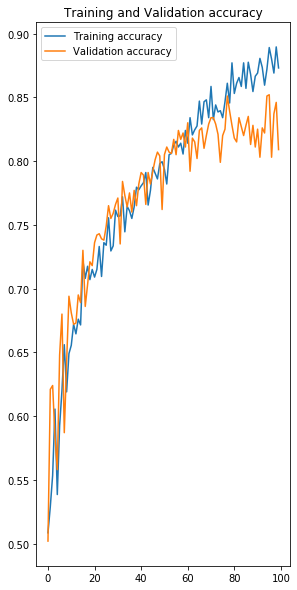

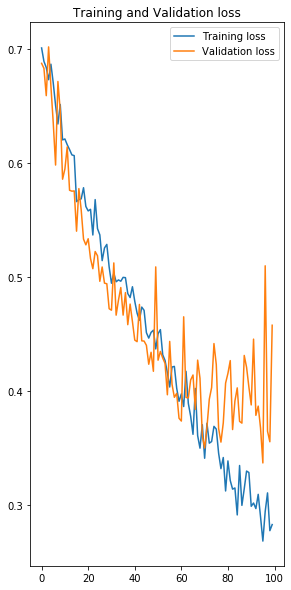

In [9]:
#analysing our results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
print(acc)
print(val_acc)

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = 'Training accuracy')
plt.plot(epochs_range,val_acc,label = 'Validation accuracy')
plt.legend()
plt.title('Training and Validation accuracy')

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,loss,label = 'Training loss')
plt.plot(epochs_range,val_loss,label = 'Validation loss')
plt.legend()
plt.title('Training and Validation loss')

In [10]:
from sklearn.metrics import mean_squared_error